In [2]:
### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False


In [3]:
### 엔스콤(anscombe) 데이터 시각화
# - seaborn 라이브러 내에서 anscombe 데이터셋을 제공하고 있음

ans = sns.load_dataset("anscombe")
ans.info()
ans

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [4]:
### 기초통계
ans.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


### dataset 컬럼의 범주형 데이터를 그룹화(집계) 하기

In [5]:
### groupby 함수 사용
# 그룹 변수명 : ans_group
# - 범주형 컬럼인 dataset 컬럼을 기준으로 그룹만 생성
# 별도의 집계함수를 사용하지 않아도 됨

ans_group = ans.groupby(["dataset"])
ans_group

In [6]:
### 그룹(집계) 된 데이터의 확인은 head() 함수를 통해서 확인
# - head(번호) : head안에 번호는 각 그룹 내에서 조회할 행의 갯수를 의미
# - 그룹별로 행의 갯수 만큼 조회함

ans_group.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
11,II,10.0,9.14
12,II,8.0,8.14
22,III,10.0,7.46
23,III,8.0,6.77
33,IV,8.0,6.58
34,IV,8.0,5.76


In [7]:
### 그룹별로 기초통계 확인하기
# - 그룹화된 데이터는 각 컬럼별 그룹화되어 기초통계를 출력

ans_group.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

#### 그룹별 데이터 추출하기

In [8]:
### ans 데이터프레임 사용
# - dataset 컬럼의 I값에 대한 데이터 전체(모든 컬럼) 조회하기
# - data1 변수에 담기

c = ans["dataset"] == "I"
c
data1 = ans[c==True]
data1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### 그래프 그리기

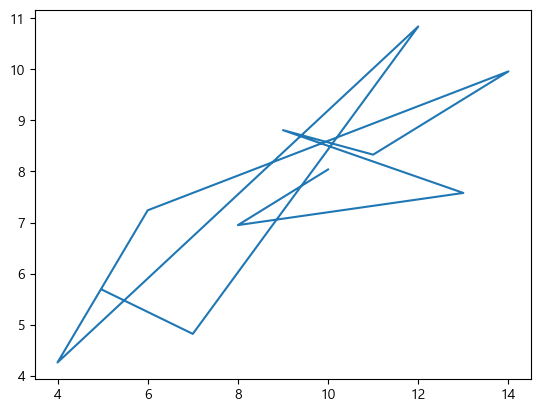

In [9]:
### matplotlib에서 제공하는 선그래프 그래기
plt.plot(data1["x"], data1["y"])
plt.show()

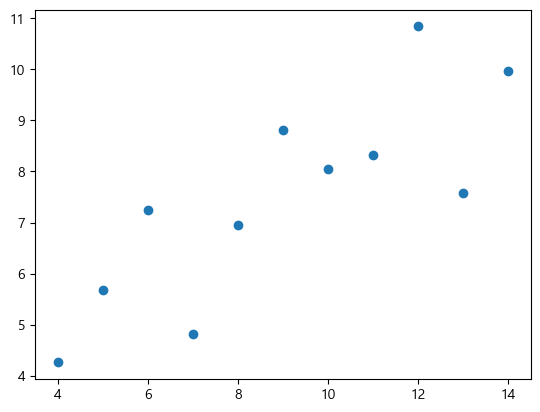

In [10]:
### matplotlib에서 제공하는 선그래프 그래기
# 점의 형태로 출력 : 산점도 그래프
# - 산점도 : 데이터(x, y)의 분포 형태를 확인 할 수 있는 그래프
plt.plot(data1["x"], data1["y"], "o")
plt.show()

### (해석)
# - 왼쪽 하단에서 오른쪽 상단으로 점의 형태가 분포한다고 해서 "우상향" 분포
# - 전반적으로 점의 형태가 우상향으로 "선형"을 나타내고 있다고 봄

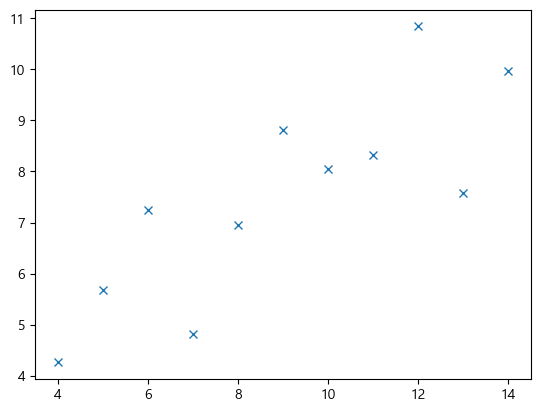

In [11]:
plt.plot(data1["x"], data1["y"], "x")
plt.show()

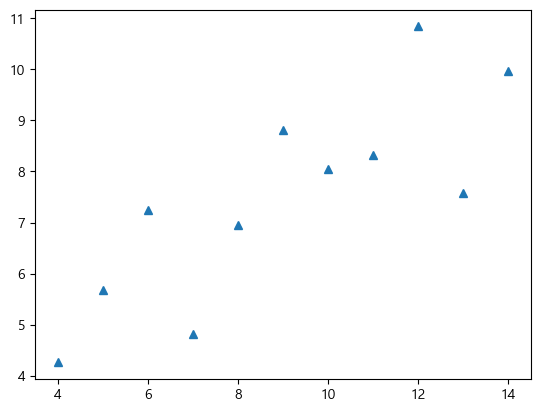

In [12]:
plt.plot(data1["x"], data1["y"], "^")
plt.show()

In [13]:
### I~IV 각각의 값별로 data1 ~ data4로 각각 데이터를 저장

data1 = ans[ans["dataset"] == "I"]
data2 = ans[ans["dataset"] == "II"]
data3 = ans[ans["dataset"] == "III"]
data4 = ans[ans["dataset"] == "IV"]

data1, data2, data3, data4

(   dataset     x      y
 0        I  10.0   8.04
 1        I   8.0   6.95
 2        I  13.0   7.58
 3        I   9.0   8.81
 4        I  11.0   8.33
 5        I  14.0   9.96
 6        I   6.0   7.24
 7        I   4.0   4.26
 8        I  12.0  10.84
 9        I   7.0   4.82
 10       I   5.0   5.68,
    dataset     x     y
 11      II  10.0  9.14
 12      II   8.0  8.14
 13      II  13.0  8.74
 14      II   9.0  8.77
 15      II  11.0  9.26
 16      II  14.0  8.10
 17      II   6.0  6.13
 18      II   4.0  3.10
 19      II  12.0  9.13
 20      II   7.0  7.26
 21      II   5.0  4.74,
    dataset     x      y
 22     III  10.0   7.46
 23     III   8.0   6.77
 24     III  13.0  12.74
 25     III   9.0   7.11
 26     III  11.0   7.81
 27     III  14.0   8.84
 28     III   6.0   6.08
 29     III   4.0   5.39
 30     III  12.0   8.15
 31     III   7.0   6.42
 32     III   5.0   5.73,
    dataset     x      y
 33      IV   8.0   6.58
 34      IV   8.0   5.76
 35      IV   8.0   7.71
 36      

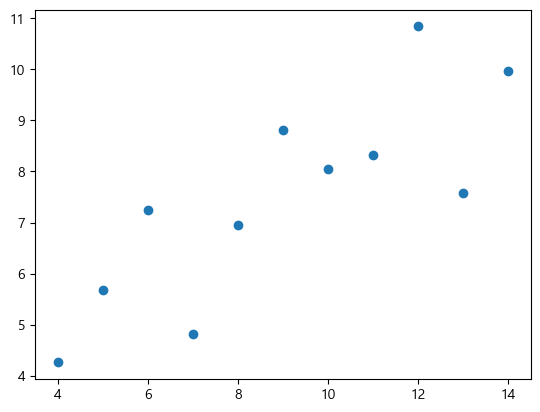

In [14]:
plt.plot(data1["x"], data1["y"], "o")
plt.show()

### 우상향 직선의 형태 (다만, 다소 분포가 퍼져 있음)

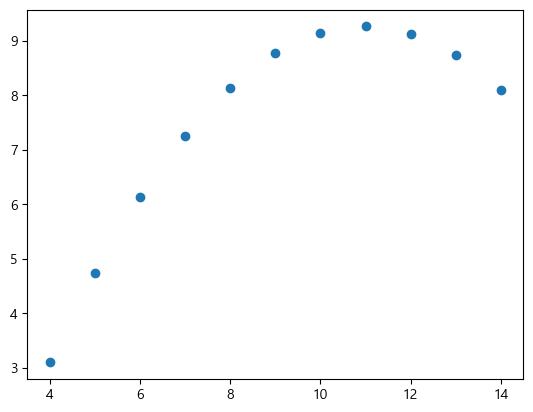

In [15]:
plt.plot(data2["x"], data2["y"], "o")
plt.show()

### 우상향 곡선 형태(다만, x축이 커질 수록 우하향의 형태를 띄고 있음)

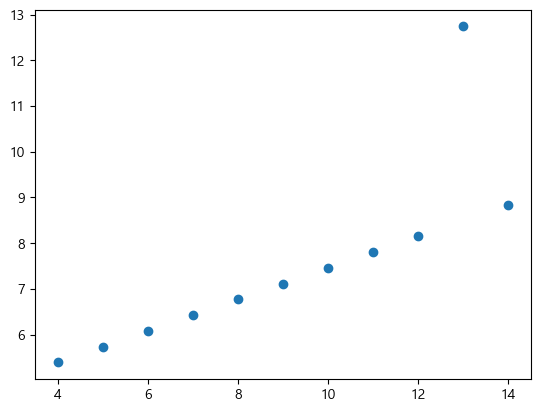

In [16]:
plt.plot(data3["x"], data3["y"], "o")
plt.show()

### 우상향 직선의 형태
# - 다만, 한개 데이터가 극단치(이상치)로 나오는 데이터가 있음
# - 전체적으로 기울기가 크지는 않음

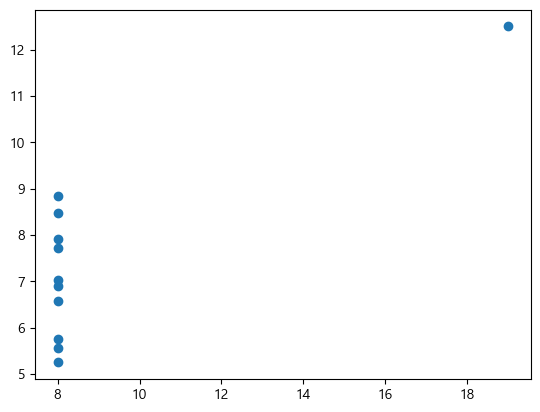

In [17]:
plt.plot(data4["x"], data4["y"], "o")
plt.show()

### 선형을 나타내지는 않음 
# - 이상치가 존재함

In [18]:
### 각각의 4개 그래프를 하나의 그래프 공간으로 합치기
# - 직관적으로 모든 그래프를 보면서 판단하기 좋음
# - subplot 이라는 함수를 사용
# - 전체 그래프를 관리하는 그래프 관리자(figure) 변수가 필요함

### 그래프 관리자(대표 그래프) 정의
fig = plt.figure()
fig

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

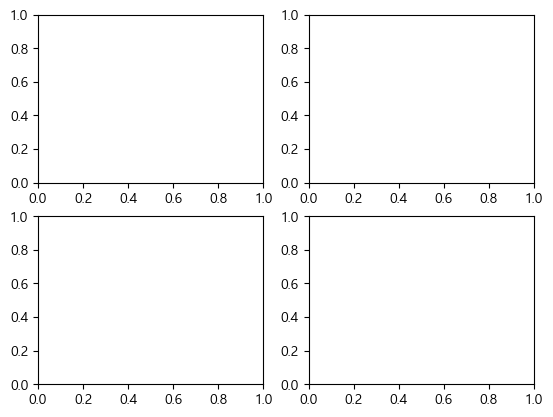

In [ ]:
### 대표 그래프 내에 4개의 행렬 공간(작은 그래프) 만들기
# - 공간 만들기를 배치한다고 칭함
# - 4개의 그래프를 배치 2행 2열로 표현 
# - 배치 공간은 행렬도 정의

# - add_subplot() : 대표 그래프 내에 작은 공간을 추가하기
# - 작은 공간 각각의 값 : Axes 라는 이름으로 관리됨

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

### 공간 잘 만들어졌는지 그려보기
# - 그릴때는 대표 관리자 변수를 출력
fig

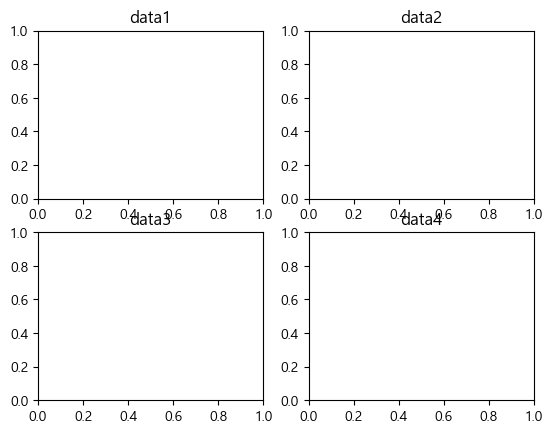

In [ ]:
### 작은 그래프마다 대표 제목 달기
# - subplot()을 이용하여 sub 영역의 작은 그래프에 제목을 정의할 때는 set_title("제목") 함수를 사용

ax1.set_title("data1")
ax2.set_title("data2")
ax3.set_title("data3")
ax4.set_title("data4")

fig

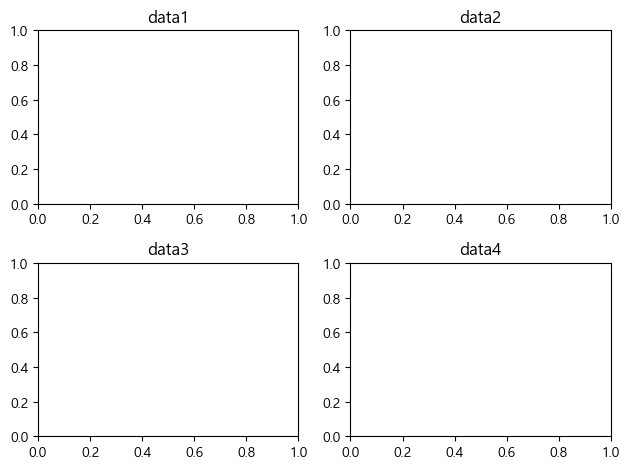

In [ ]:
### 레이아웃 자동 정렬 시키기
# - 겹치는 부분 해소됨

fig.tight_layout()
fig

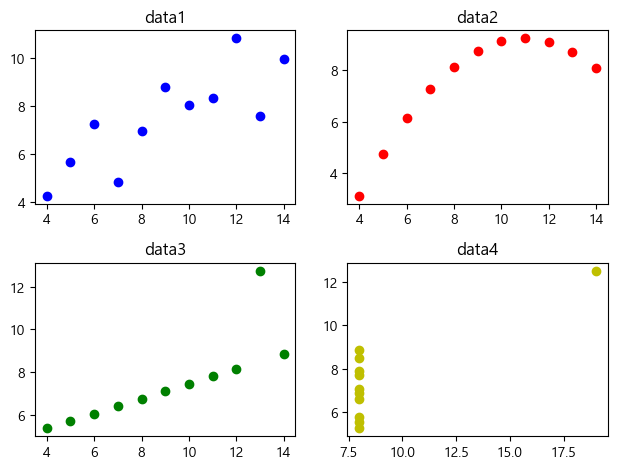

In [ ]:
### 각 공간에 data1~data4 데이터를 이용하여 산점도 그리기

ax1.plot(data1["x"], data1["y"], "o", c="b")
ax2.plot(data2["x"], data2["y"], "o", c="r")
ax3.plot(data3["x"], data3["y"], "o", c="g")
ax4.plot(data4["x"], data4["y"], "o", c="y")

fig

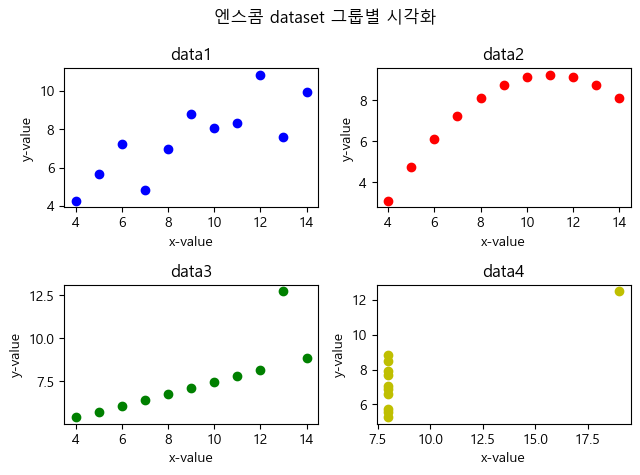

In [ ]:
### sub 그래프의 x축, y축에 이름 넣기

ax1.set_xlabel("x-value")
ax1.set_ylabel("y-value")

ax2.set_xlabel("x-value")
ax2.set_ylabel("y-value")

ax3.set_xlabel("x-value")
ax3.set_ylabel("y-value")

ax4.set_xlabel("x-value")
ax4.set_ylabel("y-value")

### 전체 대표 그래프 제목 넣기
fig.suptitle("엔스콤 dataset 그룹별 시각화")

### 자동 정렬 예의상 한번 실행
fig.tight_layout()

fig

In [24]:
### 파일로 저장하기
# - 이미지 파일 저장시 확장자는 보통 *.png를 사용

save_path = "./images/00_anscombe.png"


### bbox_inches="tight"
# - 그래프 저장시 일부 영역이 잘리는 현상을 방지하기 위해 사용
# - 이미지 저장 시 잘리지 않도록, 자동 배치되어 저장

fig.savefig(save_path, bbox_inches="tight")

### 다양한 그래프 그리기

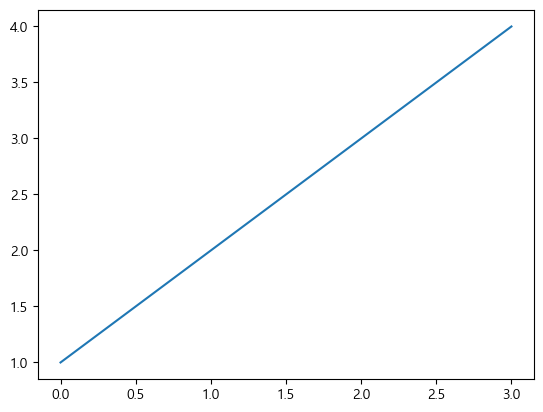

In [ ]:
### 선그래프
data_temp = [1, 2, 3, 4]

### 선그래프 그리기
# - 파일로도 저장 : 파일명 -> 01_plot_line.png
# - x축 값 : 리스트의 인덱스 번호 값
# - y축 값 : 리스트 내에 값

plt.plot(data_temp)

plt.savefig("./images/01_plot_line.png", bbox_inches="tight")
plt.show()

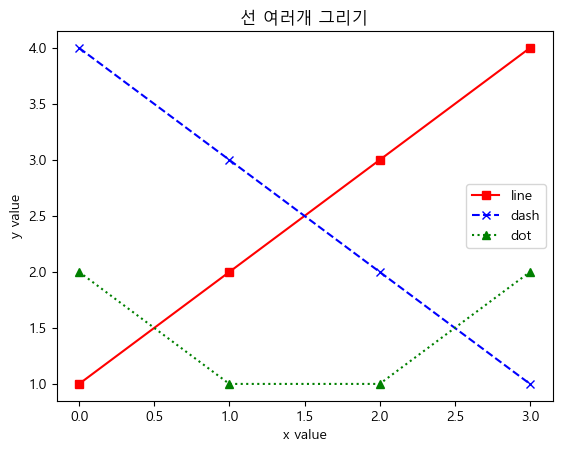

In [ ]:
### 하나의 그래프에 선 여러개 그리기
data_a = [1, 2, 3, 4]
data_b = [4, 3, 2, 1]
data_c = [2, 1, 1, 2]

plt.title("선 여러개 그리기")

# 선 여러개 그리기
plt.plot(data_a, color="red", linestyle="-", marker="s", label="line")
plt.plot(data_b, color="blue", linestyle="--", marker="x", label="dash")
plt.plot(data_c, color="green", linestyle=":", marker="^", label="dot")

# x축 y축 이름
plt.xlabel("x value")
plt.ylabel("y value")

# 범례 추가
plt.legend()

plt.show()

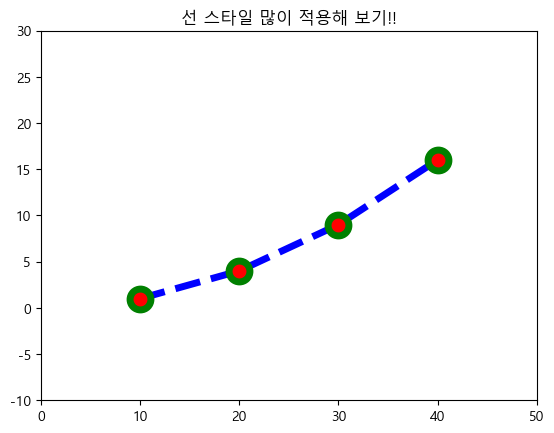

In [ ]:
### 선그래프에 스타일 많이 적용
x = [10, 20, 30, 40]
y = [1, 4, 9, 16]

plt.title("선 스타일 많이 적용해 보기!!")

# - c = color(색상)
# - lw = 선 굵기
# - ls : 선 스타일
# - marker : x축 y축 만나는 지점 표시 기호
# - ms : 마커 사이즈
# - mec : 마커 테두리 색상
# - mew : 마커 테두리 굵기(두께)
# - mfc : 마커 내부 채우기 색상

plt.plot(x, y, c="b", lw=5, ls="--", marker="o", 
         ms=15, mec="g", mew=5, mfc="r")

### x축과 y축의 범위값을 재정의하기
# - 0부터 50까지의 범위로 재정의
plt.xlim(0, 50)

# - -10부터 30까지의 범위로 재정의
plt.ylim(-10, 30)

plt.show()

### tips 데이터 사용하여 시각화 하기

In [28]:
### tips 데이터 읽어들이기
# 변수명 : tips
# - seaborn 라이브러 내에서 dataset으로 제공하고 있음
# - load_dataset() 함수 사용

tips = sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 데이터 프레임에서 제공해 주는 시각화

<Axes: >

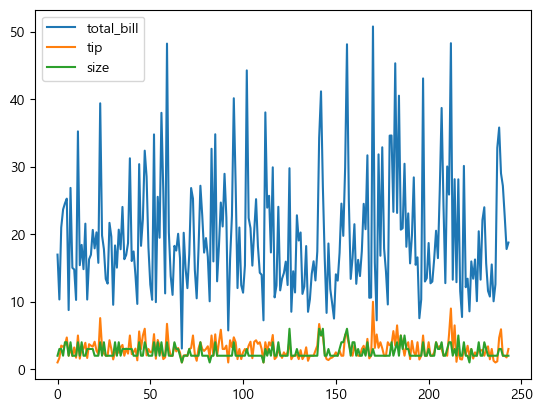

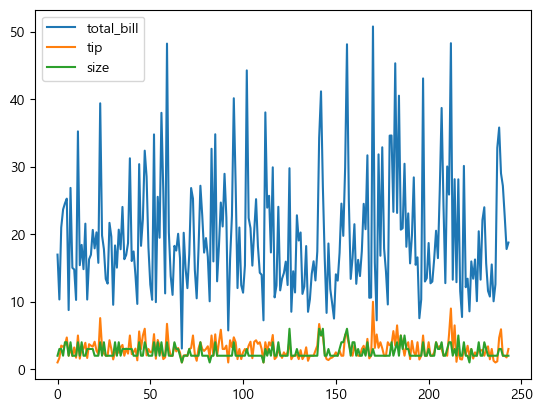

In [29]:
# - 선그래프 그리기
tips.plot()

### 데이터프레임에서 제공하는 선그래프 원형
# - 기본값(디폴트)은 line이기에 생략가능
tips.plot(kind="line")

<Axes: >

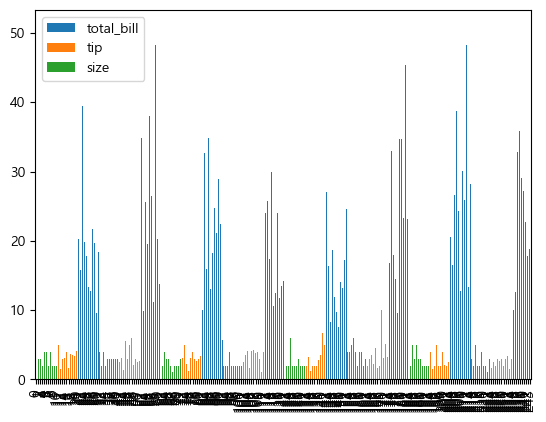

In [30]:
### 막대그래프
tips.plot(kind="bar")

<Axes: ylabel='Frequency'>

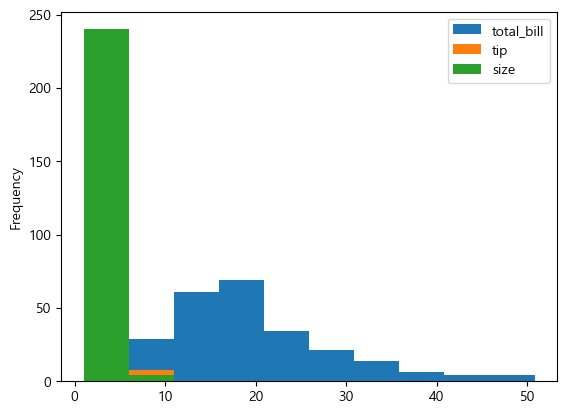

In [31]:
### 누적막대그래프 : hist
# - x축의 같은 값들에 대해서는 중첩해서 표현됨
tips.plot(kind="hist")

<Axes: >

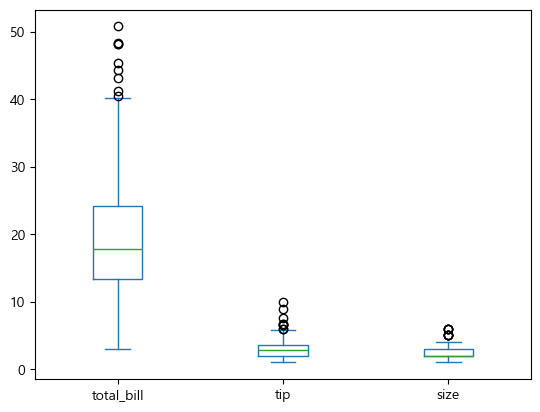

In [32]:
### 박스플롯 그리기
tips.plot(kind="box")

### matplotlib 라이브러리에서 제공하는 시각화

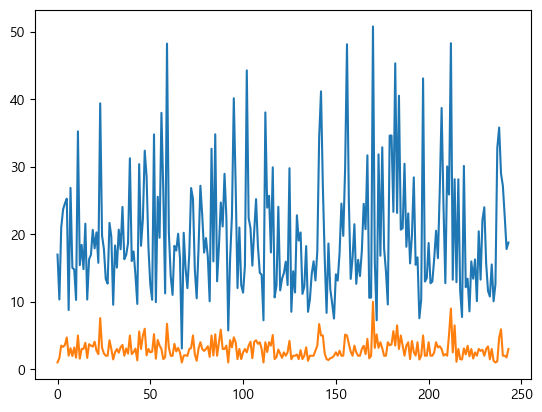

In [33]:
### 선그래프
plt.plot(tips["total_bill"])
# plt.show()

plt.plot(tips["tip"])
plt.show()

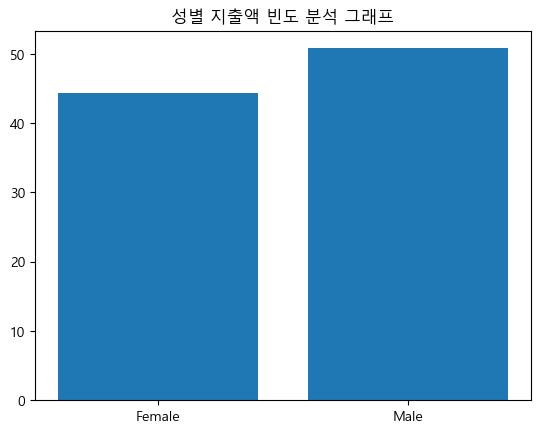

In [ ]:
### 막대그래프 그리기
# - 성별 지출액 빈도 분석 그래프
# - 빈도 분석 시에는 보통 막대 그래프로 표현(빈도 비교)

plt.title("성별 지출액 빈도 분석 그래프")
### 막대그래프 그리기 (범주형 데이터인 경우에 주로 막대그래프로 표현)
plt.bar(tips["sex"], tips["total_bill"])
plt.show()

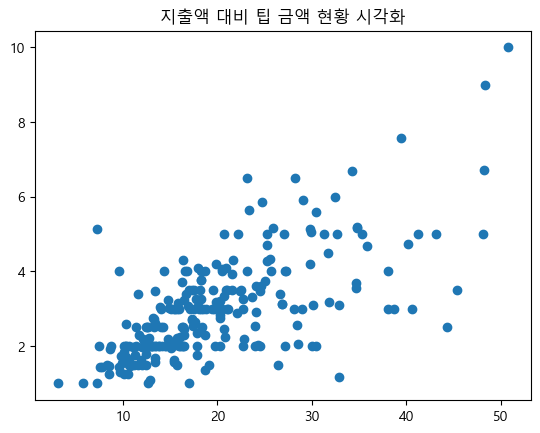

In [ ]:
### 산점도 그래프 그리기
# - 매우 많이 사용하는 그래프
# - 선형(직선, 곡선)관계, 비례(우상향, 우하향) 관계, 밀집도 확인이 가능 
plt.title("지출액 대비 팁 금액 현황 시각화")
plt.scatter(tips["total_bill"], tips["tip"])
plt.show()

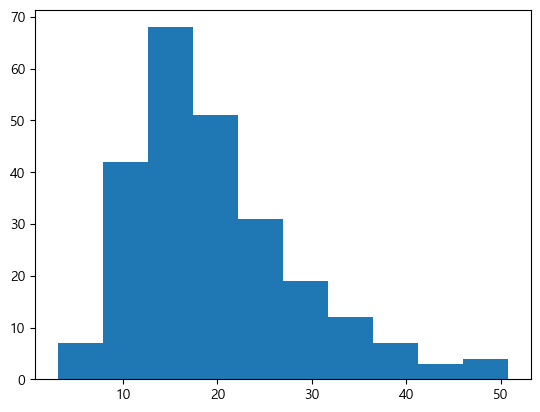

In [36]:
### 누적막대 그래프
plt.hist(tips["total_bill"])
plt.show()

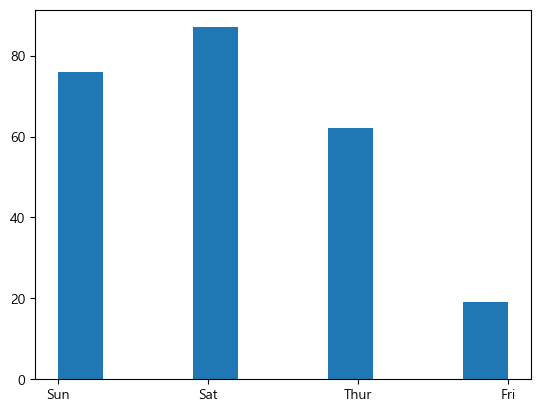

In [37]:
### 범주별로 x축을 분리해서 표현함
plt.hist(tips["day"])
plt.show()

### seaborn 라이브리에서 제공해주는 그래프

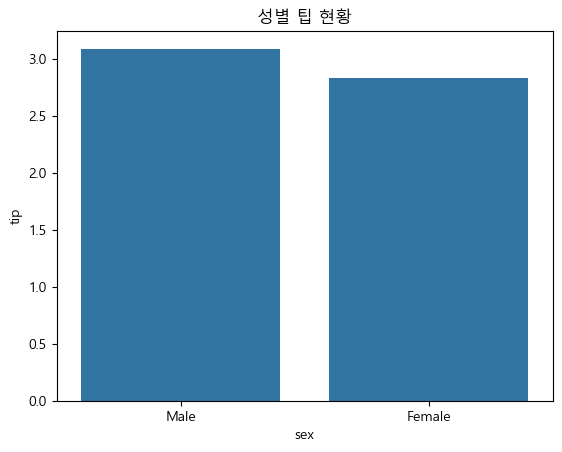

In [38]:
### 막대그래프 그리기
plt.title("성별 팁 현황")
sns.barplot(x="sex", y="tip", data=tips, errorbar=None)
plt.show()

In [39]:
### seaborn 라이브러에서 사용하는 색상을 파스텔톤으로 변경하기
# 설정 변경
# - 색상 : pastel, deep, muted, bright, dark, colorblind, 기타 등등...

sns.set_palette("pastel")

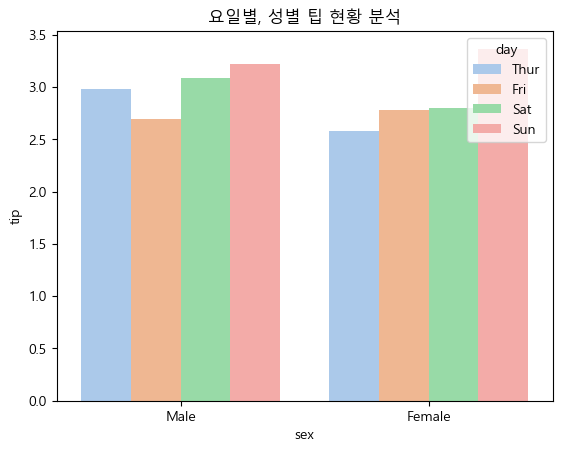

In [ ]:
### 요일별, 성별 팁 현황 분석
# - 데이터 3개를 사용하게됨

plt.title("요일별, 성별 팁 현황 분석")
sns.barplot(x="sex", y="tip", hue="day", data=tips, errorbar=None)
plt.show()

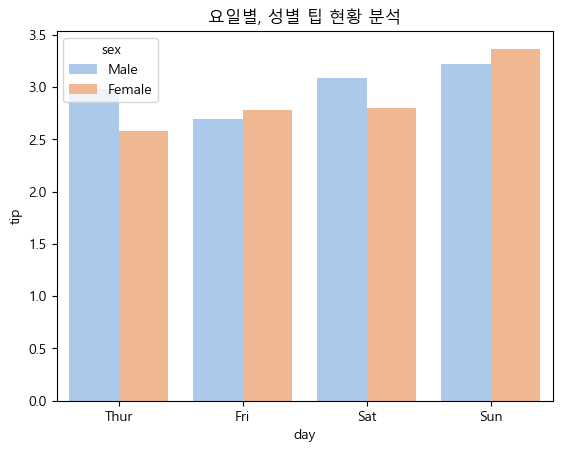

In [41]:
plt.title("요일별, 성별 팁 현황 분석")
sns.barplot(x="day", y="tip", hue="sex", data=tips, errorbar=None)
plt.show()

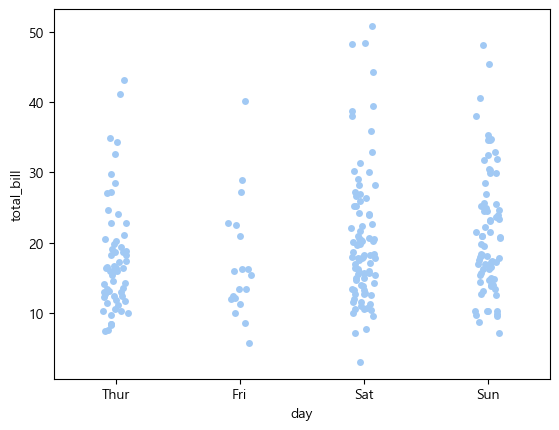

In [42]:
### 
sns.stripplot(x="day", y="total_bill", data=tips)
plt.show()

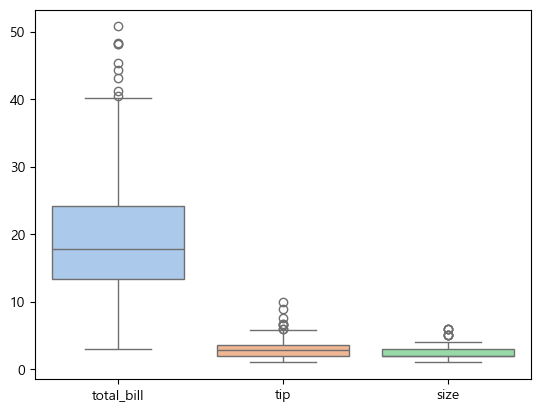

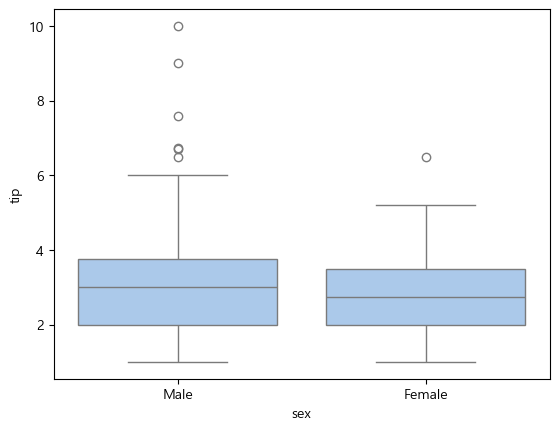

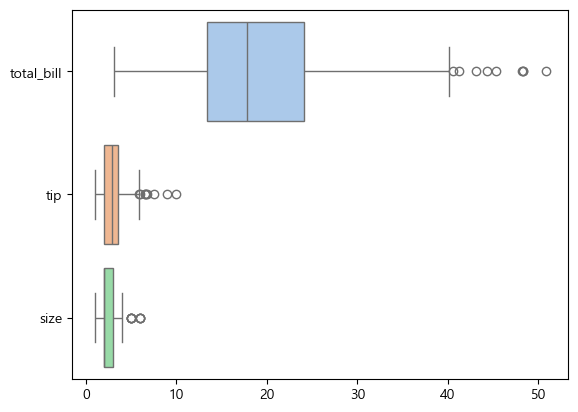

In [43]:
### 박스플롯 그리기
sns.boxplot(data=tips)
plt.show()

sns.boxplot(x="sex", y="tip", data=tips)
plt.show()

### 수평 구조로 표현
sns.boxplot(data=tips, orient="h")
plt.show()

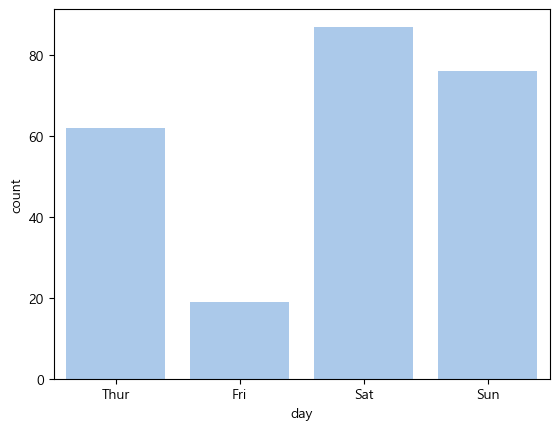

In [44]:
### 빈도 막대 그래프
# - 빈도는 count의 의미를 가짐
sns.countplot(x="day", data=tips)
plt.show()

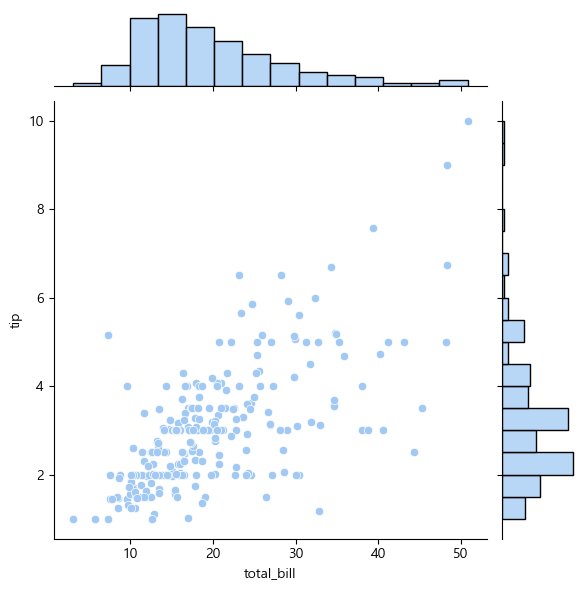

In [ ]:
### 그래프 여러개 동시에 그리기
# jointplot() 함수 사용
#  - 함수 내부에서 속성으로 그래프 형태 정의
#  - 메인 그래프는 산점도로, 상단 및 우측에는 히스토그램 막대그래프가 나타남

sns.jointplot(x="total_bill", y="tip", data=tips, kind="scatter")
plt.show()

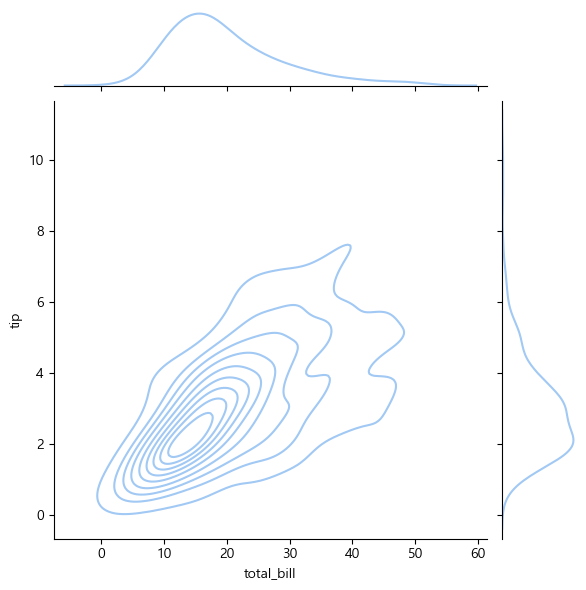

In [ ]:
### kde(커널 밀도) 그래프와 선그래프로 동시에 그려짐

sns.jointplot(x="total_bill", y="tip", data=tips, kind="kde")
plt.show()

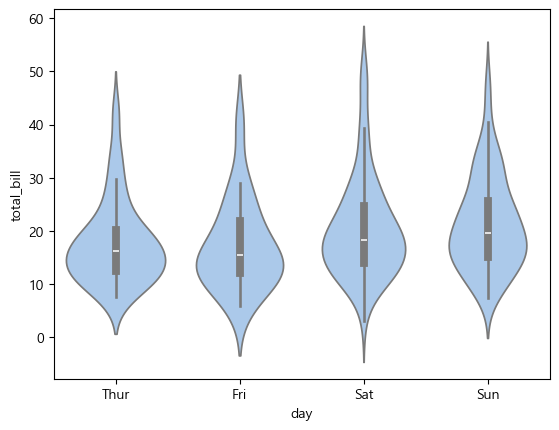

In [ ]:
### 박스플롯을 다른 형태로 나타냄...바이올린 형태

sns.violinplot(x="day", y="total_bill", data=tips)
plt.show()

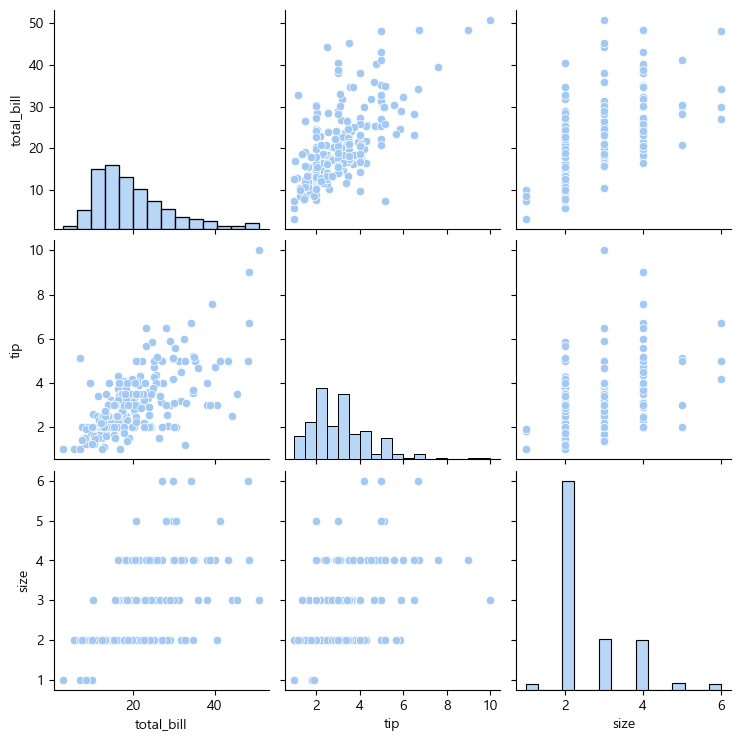

In [ ]:
### 다변량 산점도 시각화
# - 산점도 scatter와 동일하게 자주 사용

sns.pairplot(tips)
plt.show()

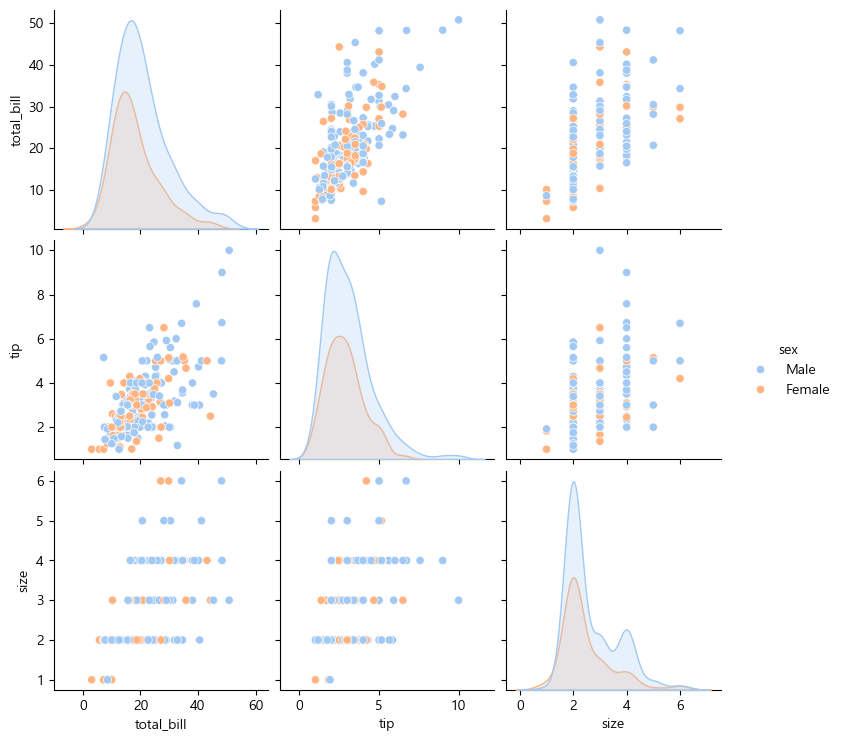

In [ ]:
### 특정 컬럼의 범주별로 분포 확인

sns.pairplot(tips, hue="sex")
plt.show()